In [1]:
from keras.optimizers import SGD, RMSprop, Adam
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import plot_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras import backend as K
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

Using TensorFlow backend.


In [2]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

In [3]:
df = pd.read_excel("returns.xlsx")
df = df.iloc[:-3]
df_copy = df.copy()

for c in df.columns:
    df["volatility_"+c] = (df[c].rolling(20).std())*np.sqrt(52)

In [4]:
df_train = df[20:167]
df_test = df[197:]

# Why is this so difficult to find lel

In [5]:
# model.predict(np.array([test_X[-1],]))

In [20]:
def fit_model(train_X, train_y, test_X, test_y):
    model = Sequential()

    model.add(Dense(20)) 
    model.add(Activation("relu"))

    model.add(Dense(40)) 
    model.add(Activation("relu"))

    model.add(Dense(10))
    model.add(Dense(1))

    model.add(Activation('linear'))

    # Compile and Run
    model.compile(loss= root_mean_squared_error, optimizer = Adam())
    model.fit(train_X, train_y, epochs = 250, batch_size = 1, verbose=1)
    
    yhat = model.predict(test_X)
    fp = model.predict(np.array([test_X[-1],])) # <-- finally
    
    return yhat, test_y, fp

In [21]:
results = {}
final_predictions = {}
for c in df_copy.columns:
    print(c)
    
    train_y = df_train["volatility_"+c].shift(1)[1:].values.astype("float32")
    test_y =  df_test["volatility_"+c].shift(1)[1:].values.astype("float32")


    train_X = df_train.iloc[:,19:].shift(-1)[:-1]
    train_X[c] = df_train[c].shift(-1)[:-1]

    test_X =  df_test.iloc[:,19:].shift(-1)[:-1]
    test_X[c] = df_test[c].shift(-1)[:-1]

    train_X = train_X.values.astype("float32")
    test_X = test_X.values.astype("float32")

    yhat, test_y, fp = fit_model(train_X, train_y, test_X, test_y)
    
    results[c] = [yhat,test_y]
    final_predictions[c] = fp # historical average or one period oos? currently the latter
    
    print("="*100)
    

ALL
Epoch 1/250
146/146 [==============================] - 2s 17ms/step - loss: 0.0255
Epoch 2/250
146/146 [==============================] - 1s 6ms/step - loss: 0.0120
Epoch 3/250
146/146 [==============================] - 1s 6ms/step - loss: 0.0172
Epoch 4/250
146/146 [==============================] - 1s 9ms/step - loss: 0.0108
Epoch 5/250
146/146 [==============================] - 1s 8ms/step - loss: 0.0114
Epoch 6/250
146/146 [==============================] - 1s 8ms/step - loss: 0.0101
Epoch 7/250
146/146 [==============================] - 1s 9ms/step - loss: 0.0103
Epoch 8/250
146/146 [==============================] - 1s 8ms/step - loss: 0.0082
Epoch 9/250
146/146 [==============================] - 1s 10ms/step - loss: 0.0095
Epoch 10/250
146/146 [==============================] - 2s 12ms/step - loss: 0.0093: 0s
Epoch 11/250
146/146 [==============================] - 1s 8ms/step - loss: 0.0092
Epoch 12/250
146/146 [==============================] - 1s 7ms/step - loss: 0.0096
Ep

Epoch 99/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0056
Epoch 100/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0060
Epoch 101/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0052
Epoch 102/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 103/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 104/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0054
Epoch 105/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0052
Epoch 106/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 107/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0052
Epoch 108/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 109/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0052
Epoch 110/250
146/146 [==============================] - 0s 3ms/step - loss: 

146/146 [==============================] - 1s 4ms/step - loss: 0.0050
Epoch 197/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 198/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0050
Epoch 199/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 200/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0046
Epoch 201/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 202/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0047
Epoch 203/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 204/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 205/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0045
Epoch 206/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 207/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0054
Epoch 

146/146 [==============================] - 0s 3ms/step - loss: 0.0077
Epoch 43/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0077
Epoch 44/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0074
Epoch 45/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0075
Epoch 46/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 47/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 48/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 49/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0079
Epoch 50/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0071
Epoch 51/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0081
Epoch 52/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 53/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0079
Epoch 54/250
146/

146/146 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 141/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0063
Epoch 142/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 143/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0062
Epoch 144/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 145/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0053
Epoch 146/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 147/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 148/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0057
Epoch 149/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 150/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0059
Epoch 151/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 

146/146 [==============================] - 1s 4ms/step - loss: 0.0054
Epoch 238/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0051
Epoch 239/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 240/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0054
Epoch 241/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 242/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0050
Epoch 243/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 244/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0049
Epoch 245/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0052
Epoch 246/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0055
Epoch 247/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 248/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0049
Epoch 

146/146 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 85/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0067
Epoch 86/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 87/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0078
Epoch 88/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 89/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0059
Epoch 90/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 91/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0057
Epoch 92/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 93/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0058
Epoch 94/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0063
Epoch 95/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 96/250
146/

146/146 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 182/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 183/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0048
Epoch 184/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0049
Epoch 185/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0049
Epoch 186/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 187/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0058
Epoch 188/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0049
Epoch 189/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0056
Epoch 190/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 191/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0061
Epoch 192/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0050
Epoch 

146/146 [==============================] - 1s 5ms/step - loss: 0.0087
Epoch 28/250
146/146 [==============================] - 1s 7ms/step - loss: 0.0089
Epoch 29/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0092
Epoch 30/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0094
Epoch 31/250
146/146 [==============================] - 1s 6ms/step - loss: 0.0113
Epoch 32/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0097
Epoch 33/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0108
Epoch 34/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0098
Epoch 35/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 36/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0094
Epoch 37/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 38/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0080
Epoch 39/250
146/

146/146 [==============================] - 1s 5ms/step - loss: 0.0087
Epoch 126/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0082
Epoch 127/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0078
Epoch 128/250
146/146 [==============================] - 1s 8ms/step - loss: 0.0063
Epoch 129/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0060
Epoch 130/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0073
Epoch 131/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0071
Epoch 132/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0077
Epoch 133/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0072
Epoch 134/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0074
Epoch 135/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0076
Epoch 136/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0086
Epoch 

146/146 [==============================] - 1s 4ms/step - loss: 0.0060
Epoch 223/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0076
Epoch 224/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0077
Epoch 225/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0063
Epoch 226/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0064
Epoch 227/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0071
Epoch 228/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0075
Epoch 229/250
146/146 [==============================] - ETA: 0s - loss: 0.006 - 1s 4ms/step - loss: 0.0068
Epoch 230/250
146/146 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 231/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0071
Epoch 232/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0063
Epoch 233/250
146/146 [==============================] - 1s 4ms/st

146/146 [==============================] - 1s 4ms/step - loss: 0.0065
Epoch 70/250
146/146 [==============================] - ETA: 0s - loss: 0.006 - 1s 4ms/step - loss: 0.0064
Epoch 71/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0076
Epoch 72/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0071
Epoch 73/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0068
Epoch 74/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0066
Epoch 75/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0065
Epoch 76/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0063
Epoch 77/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0064
Epoch 78/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0058
Epoch 79/250
146/146 [==============================] - 1s 6ms/step - loss: 0.0078
Epoch 80/250
146/146 [==============================] - 1s 5ms/step - loss: 

146/146 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 167/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0060
Epoch 168/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0056
Epoch 169/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0047
Epoch 170/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0068
Epoch 171/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0054
Epoch 172/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0049
Epoch 173/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0059
Epoch 174/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0059
Epoch 175/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0059
Epoch 176/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0052
Epoch 177/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0062
Epoch 

146/146 [==============================] - 1s 4ms/step - loss: 0.0112
Epoch 13/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0100
Epoch 14/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0125
Epoch 15/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0125
Epoch 16/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0103
Epoch 17/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0110
Epoch 18/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0123
Epoch 19/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0099
Epoch 20/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0105
Epoch 21/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0104
Epoch 22/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0101
Epoch 23/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0091
Epoch 24/250
146/

146/146 [==============================] - 1s 4ms/step - loss: 0.0060
Epoch 111/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0067
Epoch 112/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0066
Epoch 113/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0068
Epoch 114/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0064
Epoch 115/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0070
Epoch 116/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0069
Epoch 117/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0067
Epoch 118/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0073
Epoch 119/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0066
Epoch 120/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0068
Epoch 121/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0064
Epoch 

146/146 [==============================] - 1s 3ms/step - loss: 0.0068
Epoch 208/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0063
Epoch 209/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0057
Epoch 210/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0067
Epoch 211/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0061
Epoch 212/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0057
Epoch 213/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0051A: 0s - loss
Epoch 214/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0057
Epoch 215/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0056
Epoch 216/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0067
Epoch 217/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0060
Epoch 218/250
146/146 [==============================] - 1s 7ms/step - loss: 0

146/146 [==============================] - 1s 6ms/step - loss: 0.0096
Epoch 54/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0089
Epoch 55/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0097
Epoch 56/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0096
Epoch 57/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0090
Epoch 58/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0095
Epoch 59/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0096
Epoch 60/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0099
Epoch 61/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0092
Epoch 62/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0096
Epoch 63/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0087
Epoch 64/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0093
Epoch 65/250
146/

146/146 [==============================] - 1s 3ms/step - loss: 0.0078
Epoch 152/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0083
Epoch 153/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0068
Epoch 154/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0067
Epoch 155/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0077
Epoch 156/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0076
Epoch 157/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0069
Epoch 158/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0078
Epoch 159/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0071
Epoch 160/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0075
Epoch 161/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0065
Epoch 162/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0069
Epoch 

146/146 [==============================] - 1s 4ms/step - loss: 0.0062
Epoch 249/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0073
Epoch 250/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0060
Frontier M
Epoch 1/250
146/146 [==============================] - 2s 13ms/step - loss: 0.0564
Epoch 2/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0260
Epoch 3/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0183
Epoch 4/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0176
Epoch 5/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0135
Epoch 6/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0119
Epoch 7/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0127
Epoch 8/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0134
Epoch 9/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0120A: 0s - lo
Ep

146/146 [==============================] - 1s 4ms/step - loss: 0.0067
Epoch 96/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0073
Epoch 97/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0063
Epoch 98/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0059
Epoch 99/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0071
Epoch 100/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0058
Epoch 101/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0062
Epoch 102/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0067
Epoch 103/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0086
Epoch 104/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0073
Epoch 105/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0066
Epoch 106/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0072
Epoch 107/

146/146 [==============================] - 1s 4ms/step - loss: 0.0066
Epoch 193/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0066
Epoch 194/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0054
Epoch 195/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0065
Epoch 196/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0058
Epoch 197/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0062
Epoch 198/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0054
Epoch 199/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0059
Epoch 200/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0071
Epoch 201/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0067
Epoch 202/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0070
Epoch 203/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0073
Epoch 

146/146 [==============================] - 1s 4ms/step - loss: 0.0028
Epoch 39/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0025
Epoch 40/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0026
Epoch 41/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0026
Epoch 42/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0023
Epoch 43/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0022
Epoch 44/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0024
Epoch 45/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0028
Epoch 46/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0021
Epoch 47/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0022
Epoch 48/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0027
Epoch 49/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0021
Epoch 50/250
146/

146/146 [==============================] - 1s 7ms/step - loss: 0.0018
Epoch 137/250
146/146 [==============================] - 1s 7ms/step - loss: 0.0016
Epoch 138/250
146/146 [==============================] - 1s 7ms/step - loss: 0.0015
Epoch 139/250
146/146 [==============================] - 1s 6ms/step - loss: 0.0022
Epoch 140/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0018
Epoch 141/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0018
Epoch 142/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0018
Epoch 143/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0017
Epoch 144/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0017
Epoch 145/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0017
Epoch 146/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0018
Epoch 147/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0017
Epoch 

146/146 [==============================] - 1s 4ms/step - loss: 0.0016
Epoch 234/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0014
Epoch 235/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0014
Epoch 236/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0014
Epoch 237/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 238/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 239/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 240/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0014
Epoch 241/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0016
Epoch 242/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0013
Epoch 243/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0016
Epoch 244/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0013
Epoch 

146/146 [==============================] - ETA: 0s - loss: 0.001 - 1s 4ms/step - loss: 0.0016
Epoch 81/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0020
Epoch 82/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0018
Epoch 83/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0019
Epoch 84/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0019
Epoch 85/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0021
Epoch 86/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0018
Epoch 87/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0019
Epoch 88/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0018
Epoch 89/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0021
Epoch 90/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0020
Epoch 91/250
146/146 [==============================] - 1s 4ms/step - loss: 

146/146 [==============================] - 1s 4ms/step - loss: 0.0017
Epoch 178/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0013
Epoch 179/250
146/146 [==============================] - ETA: 0s - loss: 0.001 - 1s 4ms/step - loss: 0.0014
Epoch 180/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0015
Epoch 181/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0017
Epoch 182/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 183/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0014
Epoch 184/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0018
Epoch 185/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0013
Epoch 186/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0014
Epoch 187/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0016
Epoch 188/250
146/146 [==============================] - 1s 4ms/st

Epoch 23/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0021
Epoch 24/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0024
Epoch 25/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0021
Epoch 26/250
146/146 [==============================] - 1s 3ms/step - loss: 0.0021
Epoch 27/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0017
Epoch 28/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0020
Epoch 29/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0016
Epoch 30/250
146/146 [==============================] - 1s 7ms/step - loss: 0.0019
Epoch 31/250
146/146 [==============================] - 1s 7ms/step - loss: 0.0017
Epoch 32/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0015
Epoch 33/250
146/146 [==============================] - 1s 6ms/step - loss: 0.0020
Epoch 34/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0016
Epoc

146/146 [==============================] - 1s 7ms/step - loss: 8.9343e-04
Epoch 122/250
146/146 [==============================] - 1s 5ms/step - loss: 7.8615e-04
Epoch 123/250
146/146 [==============================] - 1s 4ms/step - loss: 9.8728e-04
Epoch 124/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0014
Epoch 125/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0011
Epoch 126/250
146/146 [==============================] - 1s 4ms/step - loss: 9.5257e-04
Epoch 127/250
146/146 [==============================] - 1s 4ms/step - loss: 9.4241e-04
Epoch 128/250
146/146 [==============================] - 1s 4ms/step - loss: 9.3018e-04
Epoch 129/250
146/146 [==============================] - 1s 5ms/step - loss: 7.9198e-04
Epoch 130/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0010
Epoch 131/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0011
Epoch 132/250
146/146 [==============================] - 1s 5m

146/146 [==============================] - 1s 5ms/step - loss: 9.4652e-04
Epoch 215/250
146/146 [==============================] - 1s 6ms/step - loss: 8.0056e-04
Epoch 216/250
146/146 [==============================] - 1s 6ms/step - loss: 9.0269e-04
Epoch 217/250
146/146 [==============================] - 1s 6ms/step - loss: 9.7743e-04
Epoch 218/250
146/146 [==============================] - 1s 5ms/step - loss: 8.5929e-04
Epoch 219/250
146/146 [==============================] - 1s 5ms/step - loss: 8.3247e-04
Epoch 220/250
146/146 [==============================] - 1s 5ms/step - loss: 7.9598e-04
Epoch 221/250
146/146 [==============================] - ETA: 0s - loss: 8.7531e-0 - 1s 5ms/step - loss: 9.0698e-04
Epoch 222/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0011
Epoch 223/250
146/146 [==============================] - 1s 5ms/step - loss: 8.0767e-04
Epoch 224/250
146/146 [==============================] - 1s 5ms/step - loss: 7.5613e-04
Epoch 225/250
146/146 

146/146 [==============================] - 1s 4ms/step - loss: 0.0023
Epoch 60/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0020
Epoch 61/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0022
Epoch 62/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0024
Epoch 63/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0020
Epoch 64/250
146/146 [==============================] - 1s 6ms/step - loss: 0.0021
Epoch 65/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0022
Epoch 66/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0025
Epoch 67/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0022
Epoch 68/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0022
Epoch 69/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0021
Epoch 70/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0020
Epoch 71/250
146/

146/146 [==============================] - ETA: 0s - loss: 0.001 - 1s 4ms/step - loss: 0.0016
Epoch 158/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0016
Epoch 159/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0017
Epoch 160/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0016
Epoch 161/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 162/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 163/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 164/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0015
Epoch 165/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0017
Epoch 166/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0016
Epoch 167/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0017
Epoch 168/250
146/146 [==============================] - 1s 4ms/st

146/146 [==============================] - 1s 5ms/step - loss: 0.0059
Epoch 3/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0053
Epoch 4/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0042
Epoch 5/250
146/146 [==============================] - 1s 6ms/step - loss: 0.0054
Epoch 6/250
146/146 [==============================] - 1s 6ms/step - loss: 0.0048
Epoch 7/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0055
Epoch 8/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0062
Epoch 9/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0049
Epoch 10/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0052
Epoch 11/250
146/146 [==============================] - 1s 6ms/step - loss: 0.0039
Epoch 12/250
146/146 [==============================] - 1s 6ms/step - loss: 0.0056
Epoch 13/250
146/146 [==============================] - 1s 6ms/step - loss: 0.0039
Epoch 14/250
146/146 [==

146/146 [==============================] - 1s 4ms/step - loss: 0.0032
Epoch 101/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0034
Epoch 102/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0030
Epoch 103/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0031
Epoch 104/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0031
Epoch 105/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0030
Epoch 106/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0030
Epoch 107/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0030
Epoch 108/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0032
Epoch 109/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0031
Epoch 110/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0030
Epoch 111/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0027
Epoch 

146/146 [==============================] - 1s 4ms/step - loss: 0.0028
Epoch 198/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0025
Epoch 199/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0027
Epoch 200/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0024
Epoch 201/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0026
Epoch 202/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0023
Epoch 203/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0022
Epoch 204/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0026
Epoch 205/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0026
Epoch 206/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0027
Epoch 207/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0025
Epoch 208/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0027
Epoch 

146/146 [==============================] - 1s 5ms/step - loss: 0.0042
Epoch 44/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0048
Epoch 45/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0043
Epoch 46/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0043
Epoch 47/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0053
Epoch 48/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0052
Epoch 49/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0055
Epoch 50/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0044
Epoch 51/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0046
Epoch 52/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0046
Epoch 53/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0045
Epoch 54/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0050
Epoch 55/250
146/

146/146 [==============================] - 1s 4ms/step - loss: 0.0037
Epoch 142/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0036
Epoch 143/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0035
Epoch 144/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0039
Epoch 145/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0036
Epoch 146/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0040
Epoch 147/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0037
Epoch 148/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0039
Epoch 149/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0036
Epoch 150/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0037
Epoch 151/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0040
Epoch 152/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0034
Epoch 

146/146 [==============================] - 1s 5ms/step - loss: 0.0030
Epoch 239/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0028
Epoch 240/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0029
Epoch 241/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0031
Epoch 242/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0028
Epoch 243/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0036
Epoch 244/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0031
Epoch 245/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0031
Epoch 246/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0033
Epoch 247/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0029
Epoch 248/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0031
Epoch 249/250
146/146 [==============================] - 1s 6ms/step - loss: 0.0032
Epoch 

Epoch 85/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0023
Epoch 86/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0023
Epoch 87/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0025
Epoch 88/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0028
Epoch 89/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0024
Epoch 90/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0022
Epoch 91/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0023
Epoch 92/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0023
Epoch 93/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0023
Epoch 94/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0020
Epoch 95/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0020
Epoch 96/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0020
Epoc

146/146 [==============================] - 1s 4ms/step - loss: 0.0021
Epoch 183/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0019
Epoch 184/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0022
Epoch 185/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0021
Epoch 186/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0019
Epoch 187/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0021
Epoch 188/250
146/146 [==============================] - 1s 7ms/step - loss: 0.0019
Epoch 189/250
146/146 [==============================] - 1s 6ms/step - loss: 0.0022
Epoch 190/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0020
Epoch 191/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0018
Epoch 192/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0020
Epoch 193/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0019
Epoch 

146/146 [==============================] - 1s 4ms/step - loss: 0.0070
Epoch 29/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0059
Epoch 30/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0066
Epoch 31/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0063
Epoch 32/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0052
Epoch 33/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0050
Epoch 34/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0058
Epoch 35/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0059
Epoch 36/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0067
Epoch 37/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0062
Epoch 38/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0061
Epoch 39/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0060
Epoch 40/250
146/

146/146 [==============================] - 1s 4ms/step - loss: 0.0046
Epoch 127/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0039
Epoch 128/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0044
Epoch 129/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0044
Epoch 130/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0042
Epoch 131/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0042
Epoch 132/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0043
Epoch 133/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0043
Epoch 134/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0048
Epoch 135/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0046
Epoch 136/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0040
Epoch 137/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0041
Epoch 

146/146 [==============================] - 1s 7ms/step - loss: 0.0045
Epoch 224/250
146/146 [==============================] - 1s 6ms/step - loss: 0.0041
Epoch 225/250
146/146 [==============================] - 1s 6ms/step - loss: 0.0039
Epoch 226/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0039
Epoch 227/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0039
Epoch 228/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0036
Epoch 229/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0035
Epoch 230/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0042
Epoch 231/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0048
Epoch 232/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0035
Epoch 233/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0037
Epoch 234/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0035
Epoch 

146/146 [==============================] - 1s 4ms/step - loss: 0.0017
Epoch 70/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0018
Epoch 71/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0019
Epoch 72/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0020
Epoch 73/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0018
Epoch 74/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0017
Epoch 75/250
146/146 [==============================] - 1s 6ms/step - loss: 0.0021
Epoch 76/250
146/146 [==============================] - 1s 7ms/step - loss: 0.0017
Epoch 77/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0017
Epoch 78/250
146/146 [==============================] - 1s 6ms/step - loss: 0.0018
Epoch 79/250
146/146 [==============================] - 1s 7ms/step - loss: 0.0018
Epoch 80/250
146/146 [==============================] - 1s 6ms/step - loss: 0.0017
Epoch 81/250
146/

146/146 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 167/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 168/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 169/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 170/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 171/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0016
Epoch 172/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0017
Epoch 173/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 174/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0016
Epoch 175/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 176/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0016
Epoch 177/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0014
Epoch 

146/146 [==============================] - 1s 4ms/step - loss: 0.0042
Epoch 13/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0034
Epoch 14/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0034
Epoch 15/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0033
Epoch 16/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0034
Epoch 17/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0030
Epoch 18/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0035
Epoch 19/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0037
Epoch 20/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0029
Epoch 21/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0037
Epoch 22/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0033
Epoch 23/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0031
Epoch 24/250
146/

146/146 [==============================] - 1s 4ms/step - loss: 0.0026
Epoch 111/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0026
Epoch 112/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0023
Epoch 113/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0023
Epoch 114/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0025
Epoch 115/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0023
Epoch 116/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0022
Epoch 117/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0022
Epoch 118/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0022
Epoch 119/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0022
Epoch 120/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0022
Epoch 121/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0022
Epoch 

146/146 [==============================] - 1s 4ms/step - loss: 0.0020
Epoch 208/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0019
Epoch 209/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0018
Epoch 210/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0018
Epoch 211/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0021
Epoch 212/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0020
Epoch 213/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0019
Epoch 214/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0019
Epoch 215/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0019
Epoch 216/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0019
Epoch 217/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0022
Epoch 218/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0019
Epoch 

146/146 [==============================] - 1s 4ms/step - loss: 0.0042
Epoch 54/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0039
Epoch 55/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0035
Epoch 56/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0036
Epoch 57/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0038
Epoch 58/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0052
Epoch 59/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0034
Epoch 60/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0033
Epoch 61/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0041
Epoch 62/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0036
Epoch 63/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0038
Epoch 64/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0033
Epoch 65/250
146/

146/146 [==============================] - 1s 4ms/step - loss: 0.0031
Epoch 152/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0031
Epoch 153/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0029
Epoch 154/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0035
Epoch 155/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0032
Epoch 156/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0028
Epoch 157/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0030
Epoch 158/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0035
Epoch 159/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0032
Epoch 160/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0028
Epoch 161/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0034
Epoch 162/250
146/146 [==============================] - 1s 4ms/step - loss: 0.0029
Epoch 

146/146 [==============================] - 1s 5ms/step - loss: 0.0026
Epoch 249/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0025
Epoch 250/250
146/146 [==============================] - 1s 5ms/step - loss: 0.0025


In [22]:
final_predictions

{'1-3Y': array([[0.01251176]], dtype=float32),
 '1-3Y.1': array([[0.020553]], dtype=float32),
 '3-5Y': array([[0.0281328]], dtype=float32),
 '3-5Y.1': array([[0.03314252]], dtype=float32),
 '7-10 Y': array([[0.0591852]], dtype=float32),
 '7-10 Y.1': array([[0.05972682]], dtype=float32),
 'ALL': array([[0.15771854]], dtype=float32),
 'ALL TB': array([[0.02984499]], dtype=float32),
 'All (TR + CB)': array([[0.02576772]], dtype=float32),
 'Emerging M': array([[0.18722726]], dtype=float32),
 'Europe': array([[0.14391325]], dtype=float32),
 'Frontier M': array([[0.10044294]], dtype=float32),
 'High Yield': array([[0.08931559]], dtype=float32),
 'Inflation Linked': array([[0.0615181]], dtype=float32),
 'Inv Grade': array([[0.03737845]], dtype=float32),
 'Japan': array([[0.19094655]], dtype=float32),
 'SMALL': array([[0.18635894]], dtype=float32),
 'US': array([[0.18122523]], dtype=float32),
 'VALUE': array([[0.16396022]], dtype=float32)}

In [23]:
# yhat = model.predict(test_X)
# print(mean_absolute_error(yhat, test_y))

In [24]:
# print(test_y)

In [71]:
font = {'fontname':'Times New Roman'}
import matplotlib.font_manager as font_manager
font1 = font_manager.FontProperties(family='Times New Roman', size=12)

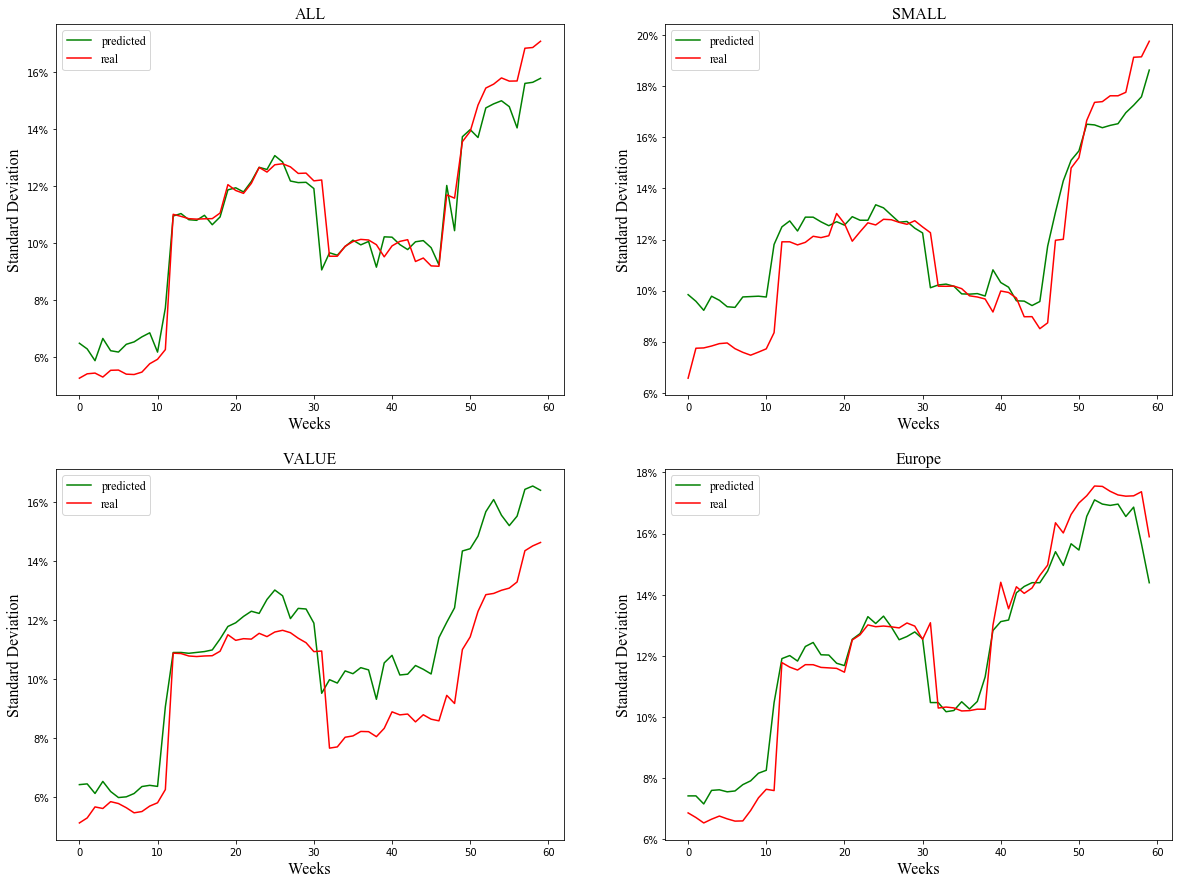

In [76]:
count = 1
plt.style.context('seaborn')
plt.figure(figsize=(20,15))
for c in df_copy.columns:

    plt.subplot(2, 2, count)
    
    plt.plot(results[c][0], "g", label = "predicted")
    plt.plot(results[c][1], "r", label = "real")

    plt.xlabel("Weeks", **font, size = 16)
    plt.ylabel("Standard Deviation", **font, size = 16)
    
    plt.title(c, **font, size = 16)
    plt.legend(prop = font1)
    
    plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
    count += 1
    if count == 5:
        break

# plt.plot(results["Japan"][0], "g", label = "predicted")
# plt.plot(results["Japan"][1], "r", label = "real")

plt.savefig("NN_predictions.png")  